## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



## Reading Dataset using Pandas

In [26]:
Dataset = pd.read_excel('Potential datasets for recruitment.xlsx','Dataset 1')

In [27]:
Dataset.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


## Data Visualization

(504, 20)


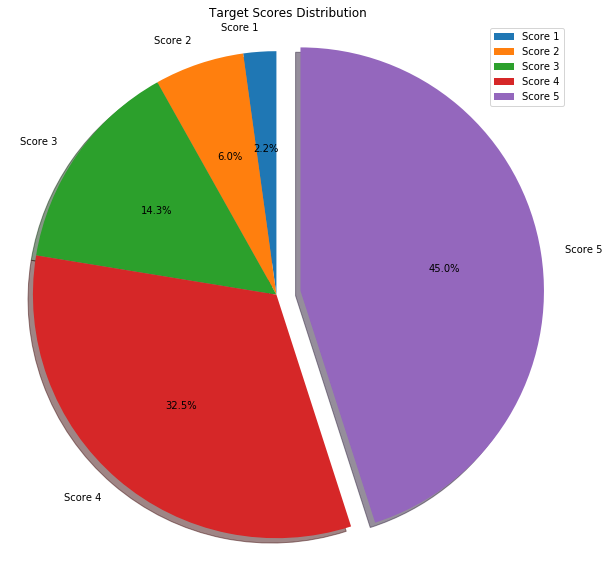

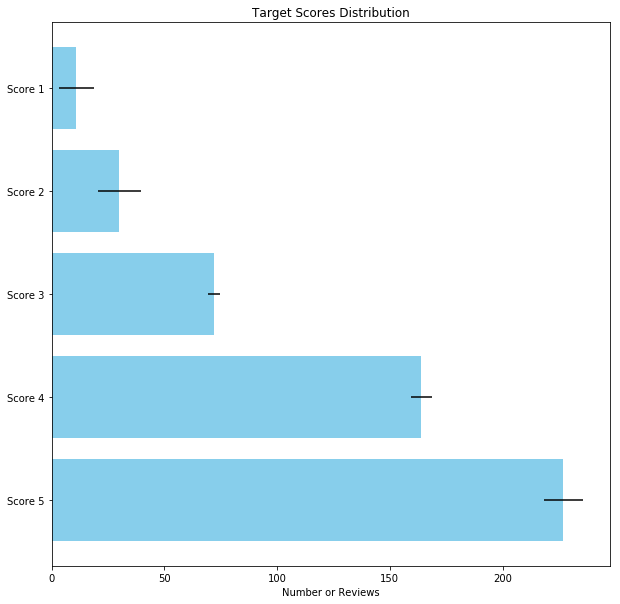

In [28]:
vals=[]
temp_data = Dataset.values
print(temp_data.shape)
for ix in range(1,6):
    val = np.sum([temp_data[:,4]==ix])
    vals.append(val)    

    
  ##------>> Pie Chart  
target = ('Score 1','Score 2','Score 3','Score 4','Score 5')
sizes=vals
explode=(0,0,0,0,0.1)
fig1, ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=target,shadow='true', autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()
ax1.set_title('Target Scores Distribution ')

  ##------>>Bar Graph
# plt.bar(vals,)
# plt.bar(x=target,height=vals,orientation='horizontal')
y_pos=np.arange(len(target))
fig2,ax2 = plt.subplots(figsize=(10,10))
error = np.random.rand(len(target))*10
ax2.barh(y_pos,vals,align='center',xerr=error,color='skyblue',ecolor='black')
ax2.set_title("Target Scores Distribution")

ax2.set_xlabel('Number or Reviews')
ax2.invert_yaxis()
ax2.set_yticks(y_pos)
ax2.set_yticklabels(target)
plt.show()


Looks Like the most of the reviewers have given a score of 5,4 

## Checking for any Missing Values in data before LabelEncoding

In [40]:
# for col in Dataset.columns:
#     print(np.unique(Dataset[col]))

## After seeing all unique values in each column I Found 'Members Years' and 'Hotel Stars' have bad Datapoins which need to be cleaned 

In [38]:
arr = Dataset['Hotel stars']=='3,5'

for ix in range(arr.shape[0]):
    if arr[ix]:
        Dataset['Hotel stars'][ix] = 3
        
        
arr = Dataset['Hotel stars']=='4,5'

for ix in range(arr.shape[0]):
    if arr[ix]:
        Dataset['Hotel stars'][ix] = 4      
        
arr = Dataset['Member years']==-1806

for ix in range(arr.shape[0]):
    if arr[ix]:
        Dataset['Member years'][ix] = 5

## Encoding Catagorical Data into values with LabelEncoder

In [5]:
ds=Dataset
le = LabelEncoder()
ds = ds.apply(le.fit_transform)
ds.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,46,10,3,13,4,0,3,0,1,0,0,1,1,2,0,17,3,10,4,4
1,46,99,20,66,2,0,0,0,1,0,0,1,1,2,0,17,3,4,4,0
2,46,35,8,25,4,2,2,0,1,0,0,1,1,2,0,17,3,3,3,2
3,45,13,6,14,3,2,3,0,1,0,0,1,1,2,0,17,2,7,3,0
4,3,4,4,2,3,2,4,0,1,0,0,1,1,2,0,17,3,8,7,5


## Finding Relevant Features  Q. 2


In [6]:
import seaborn as sns

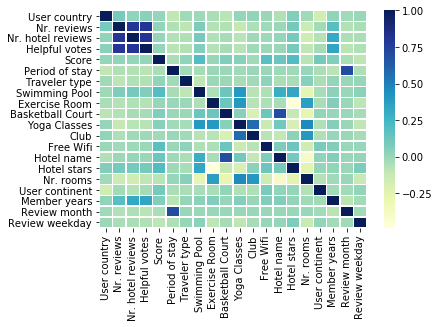

In [7]:
corr_mat = ds.corr()
# sns.heatmap?
sns.heatmap(corr_mat,xticklabels=ds.columns,yticklabels=ds.columns,cmap="YlGnBu",linewidths=.5)

Heatmap shows that most the features are not corelated hence we cannot eliminate any of them o basis of corelation

## Classifying Features Type  

## Feature Extraction

In [8]:
cols_drop={
    'User country',
    'Period of stay',
    'Hotel name',
    'User continent',
    'Review month',
    'Review weekday',
    'Helpful votes',
    'Nr. hotel reviews'
    
}




In [9]:
ds = Dataset.drop(cols_drop,axis=1)
ds=ds.apply(le.fit_transform)
x_=ds.values
x_=np.array(x_)
np.random.shuffle(x_)
ds.head()

,Nr. reviews,Score,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel stars,Nr. rooms,Member years
0,10,4,3,0,1,0,0,1,1,0,17,10
1,99,2,0,0,1,0,0,1,1,0,17,4
2,35,4,2,0,1,0,0,1,1,0,17,3
3,13,3,3,0,1,0,0,1,1,0,17,7
4,4,3,4,0,1,0,0,1,1,0,17,8


## HeatMap After Removing Co-Related features 

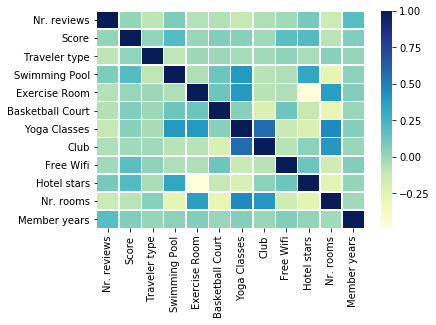

In [10]:
corr_mat = ds.corr()
# sns.heatmap?
sns.heatmap(corr_mat,xticklabels=ds.columns,yticklabels=ds.columns,cmap="YlGnBu",linewidths=.5)

## Seperating Target values and Feature Values

In [11]:
data_y = x_[:,1]
data_y=data_y+1
data_y= np.array(data_y)
print(np.unique(data_y))


[1 2 3 4 5]


In [12]:
data_x=ds.drop('Score',axis=1)
data_x_v =data_x.values
data_x_v.shape

(504, 11)

## Slicing Data for Training and Testing

In [13]:
x_train,x_test,y_train,y_test = train_test_split(data_x_v,data_y,test_size=0.2)

## Q. 1 Building Classification Models

## Classification Using Different Classifiers

## 1. Naive Bayes

In [14]:
classifier =  BernoulliNB()

classifier.fit(x_train,y_train)

score_testing = classifier.score(x_test,y_test)
score_training = classifier.score(x_train,y_train)


print("Score on Testing Data : %",score_testing)
print("Score on Training Data : %",score_training)

('Score on Testing Data : %', 0.504950495049505)
('Score on Training Data : %', 0.41935483870967744)


## 2.Decision Tree

In [15]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
score_testing_dt = dt.score(x_test,y_test)
score_training_dt = dt.score(x_train,y_train)

print("Score on Testing Data : %",score_testing_dt)
print("Score on Training Data : %",score_training_dt)

('Score on Testing Data : %', 0.2871287128712871)
('Score on Training Data : %', 0.9950372208436724)


## 3. Support Vector Machine  OneVSRest Classifier

In [17]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

## - OneVsRestClassifier

In [18]:
lr1 = OneVsRestClassifier(SVC(kernel='linear'))
lr1.fit(x_train,y_train)

score_testing_lr1 = lr1.score(x_test,y_test)
score_training_lr1 = lr1.score(x_train,y_train)


print('Score on Testing Data : %',score_testing_lr1)
print('Score on Trainig Data : %',score_training_lr1)

('Score on Testing Data : %', 0.42574257425742573)
('Score on Trainig Data : %', 0.3771712158808933)


## - OneVsOneClassifier

In [19]:

lr2 = OneVsOneClassifier(SVC(kernel='linear'))
lr2.fit(x_train,y_train)

score_testing_lr2 = lr2.score(x_test,y_test)
score_training_lr2 = lr2.score(x_train,y_train)


print("Score on Testing Data : %",score_testing_lr2)
print("Score on Training Data : %",score_training_lr2)

('Score on Testing Data : %', 0.5544554455445545)
('Score on Training Data : %', 0.43672456575682383)


## 4. Random Forrest

In [20]:
from sklearn.ensemble import RandomForestClassifier


/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

score_testing_rf = rf.score(x_test,y_test)
score_training_rf = rf.score(x_train,y_train)


print("Score on Testing Data : %",score_testing_rf)
print("Score on Training Data : %",score_training_rf)

('Score on Testing Data : %', 0.3465346534653465)
('Score on Training Data : %', 0.9950372208436724)


## Recursive Feature Elimination with cross-validation for varifying the relevance of features chosen

Optimal number of features : 3
[False False False False  True  True  True False False False False]


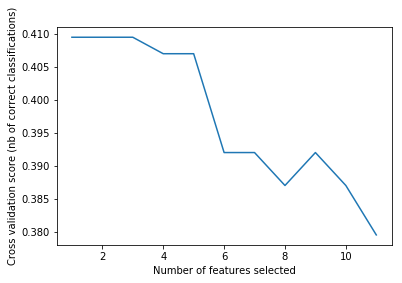

In [24]:
estim=SVC(kernel='linear')

rfecv = RFECV(estimator=estim, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(x_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.support_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Accuracy vs number of Features Graph shows a very low Variance on y- axis which means the acuuracy changes for about (0.02-0.03) for RFECV. Thus it shows we should not further decrease feature becuase it can cause in decrease in accuracy with new testing data.